Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Height         10 non-null     object
 1   Weight         10 non-null     object
 2   Age            10 non-null     object
 3   Grip Strength  10 non-null     object
 4   Frailty        10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes
None

First few rows:
  Height Weight  Age Grip Strength Frailty
0  65.8    112   30            30       N 
1  71.5    136   19            31       N 
2  69.4    153   45            29       N 
3  68.2    142   22            28       Y 
4  67.8    144   29            24       Y 

Missing Values:
Height           0
Weight           0
Age              0
Grip Strength    0
Frailty          0
dtype: int64
Cleaned data saved to Frailty_Analysis/data/processed/Frailty_Analysis_Cleaned.csv


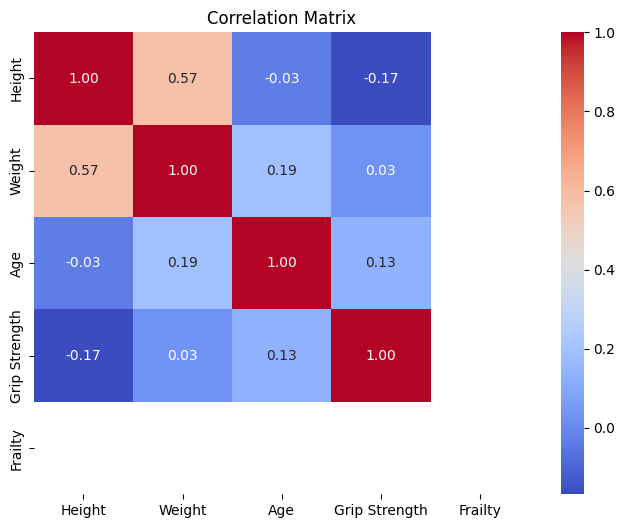

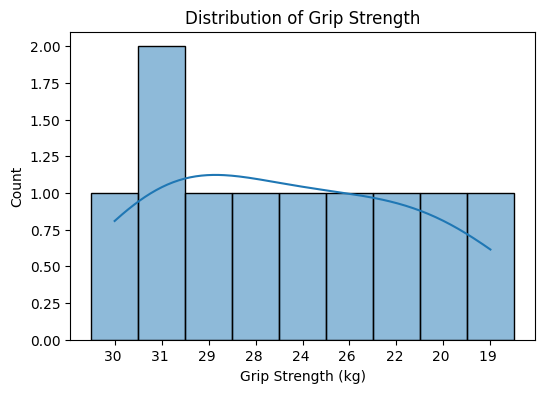

Summary statistics saved to Frailty_Analysis/results/summary_statistics.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define folder structure
base_dir = "Frailty_Analysis"
data_dir = os.path.join(base_dir, "data")
processed_dir = os.path.join(data_dir, "processed")
results_dir = os.path.join(base_dir, "results")
figures_dir = os.path.join(results_dir, "figures")

# Create directories if they don't exist
for directory in [data_dir, processed_dir, results_dir, figures_dir]:
    os.makedirs(directory, exist_ok=True)

# Load dataset
data_path = "/content/Frailty Analysis Data.csv"
df = pd.read_csv(data_path)

# Display basic info
print("Dataset Overview:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert qualitative 'Frailty' column to numerical (if necessary)
if 'Frailty' in df.columns:
    df['Frailty'] = df['Frailty'].map({'Yes': 1, 'No': 0})

# Save cleaned data
cleaned_data_path = os.path.join(processed_dir, "Frailty_Analysis_Cleaned.csv")
df.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")

# Correlation analysis
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.savefig(os.path.join(figures_dir, "correlation_matrix.png"))
plt.show()

# Grip strength distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Grip Strength'], bins=10, kde=True)
plt.xlabel("Grip Strength (kg)")
plt.ylabel("Count")
plt.title("Distribution of Grip Strength")
plt.savefig(os.path.join(figures_dir, "grip_strength_distribution.png"))
plt.show()

# Summarize statistics
summary_stats = df.describe()
summary_stats_path = os.path.join(results_dir, "summary_statistics.csv")
summary_stats.to_csv(summary_stats_path)
print(f"Summary statistics saved to {summary_stats_path}")
